In [1]:
!pip install fastai --upgrade
!pip install torch --upgrade
!pip install fastbook --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32

In [2]:
from fastai.vision.all import *
from fastbook import *
from pathlib import Path

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
searches = ['car', 'tree', 'water', 'nature', 'people', 'street', 'building']
folder='random'
p=Path('images')
if not p.exists():
    for o in searches:
        dest=Path(p/folder)
        print(dest)
        dest.mkdir(exist_ok=True,parents=True)
        results=search_images_ddg(f'{o} photo')
        download_images(dest,urls=results[:200])
        resize_images(dest,max_size=400,dest=dest)

images/random
images/random


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


images/random


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


images/random
images/random


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


images/random
images/random


In [5]:
searches = ['chest', 'brain']
p=Path('images')

for o in searches:
    dest=Path(p/o)
    print(dest)
    dest.mkdir(exist_ok=True,parents=True)
    results=search_images_ddg(f'{o} x-ray photo')
    download_images(dest,urls=results[:200])
    resize_images(dest,max_size=400,dest=dest)

images/cheast
images/brain


In [6]:
failed=verify_images(get_image_files(p))
failed.map(Path.unlink)

(#47) [None,None,None,None,None,None,None,None,None,None...]

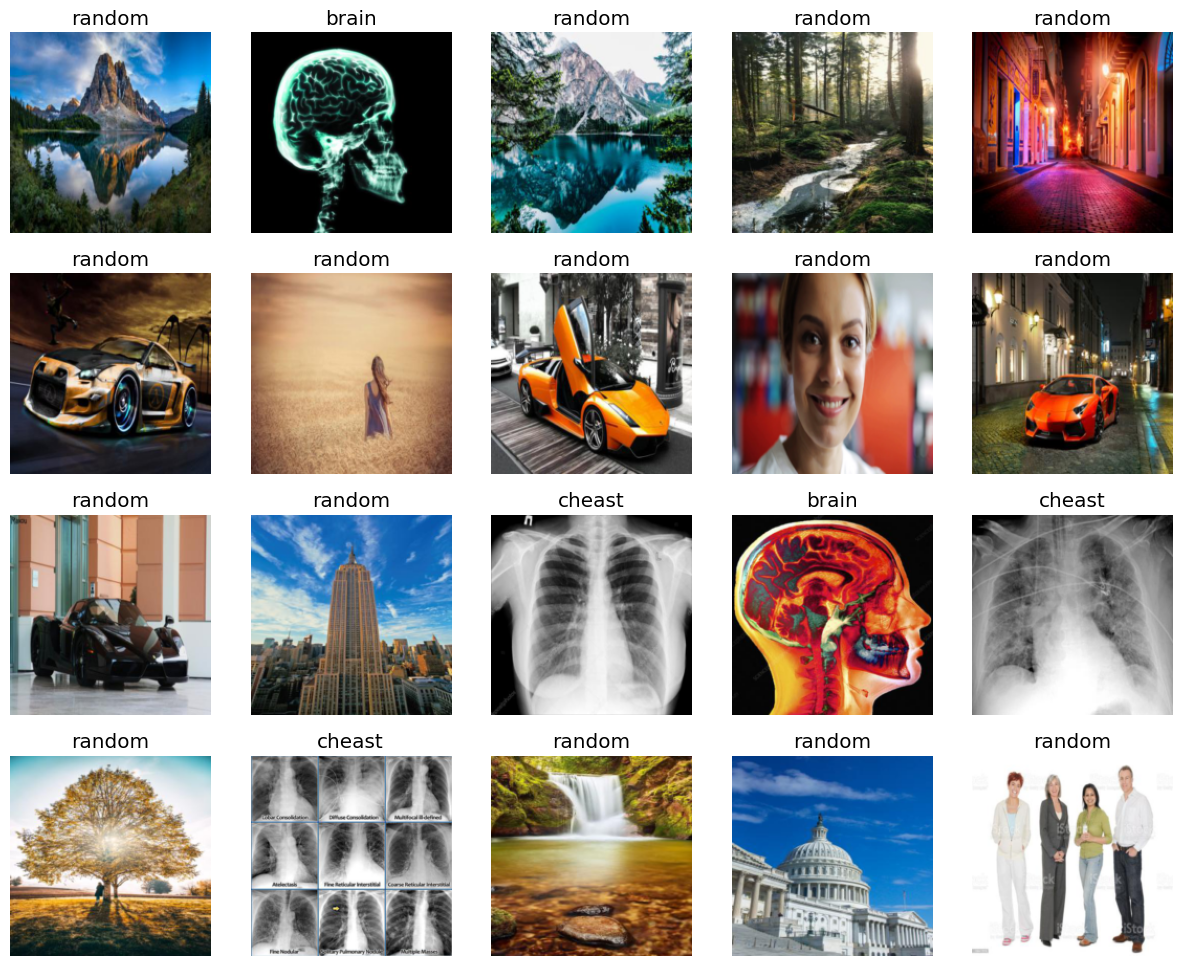

In [11]:
dls=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
        item_tfms=[Resize(192,method='squish')]
).dataloaders(p)

dls.show_batch(max_n=20)

In [8]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(epochs=10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,1.129205,0.318714,0.887850,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.274164,0.151859,0.962617,00:11
1,0.148632,0.053587,0.978193,00:10
2,0.085633,0.027166,0.984424,00:10
3,0.056553,0.014932,0.993769,00:11
4,0.037825,0.015151,0.993769,00:08
5,0.026132,0.015246,0.996885,00:14
6,0.019138,0.020776,0.993769,00:09
7,0.013600,0.041928,0.987539,00:10
8,0.010356,0.041784,0.987539,00:11
9,0.009368,0.042329,0.987539,00:09


In [9]:
learn.export('Binarymodel.pkl')